In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets
train_data = pd.read_csv('train_cleaned.csv')

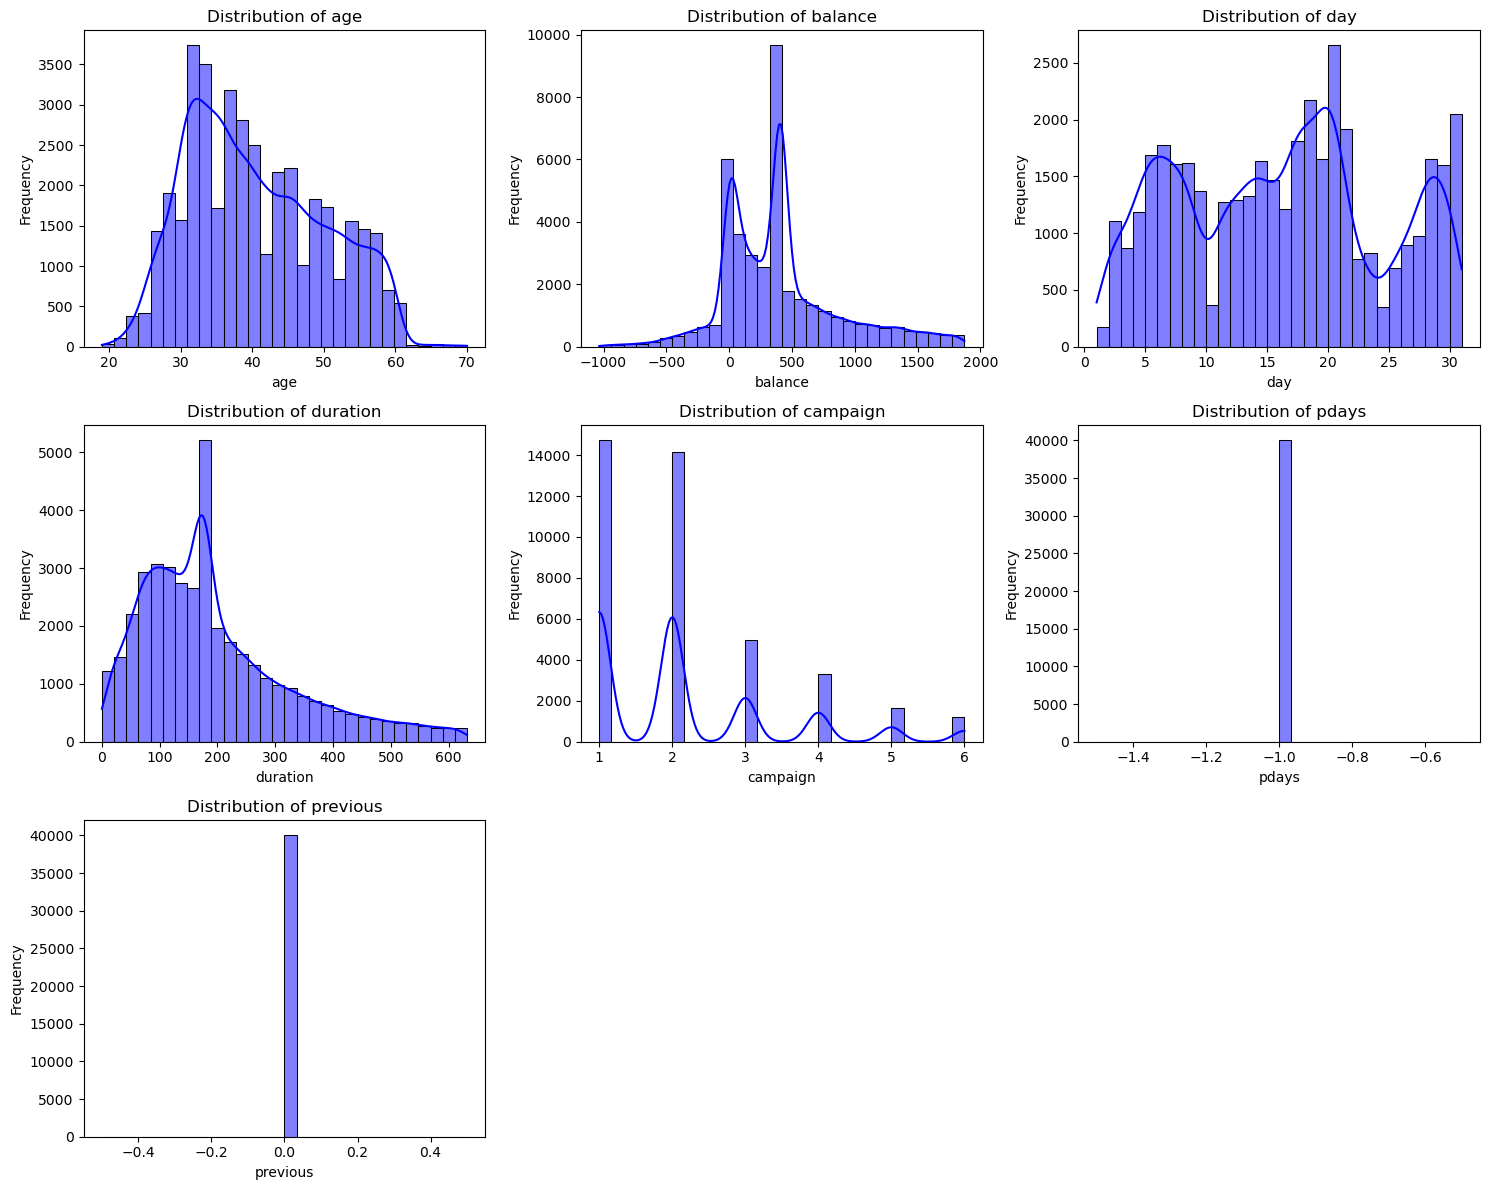

In [43]:
# Distribution of Numerical Columns in Subplots
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_cols)  
cols = 3  
rows = -(-num_cols // cols) 
plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(train_data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

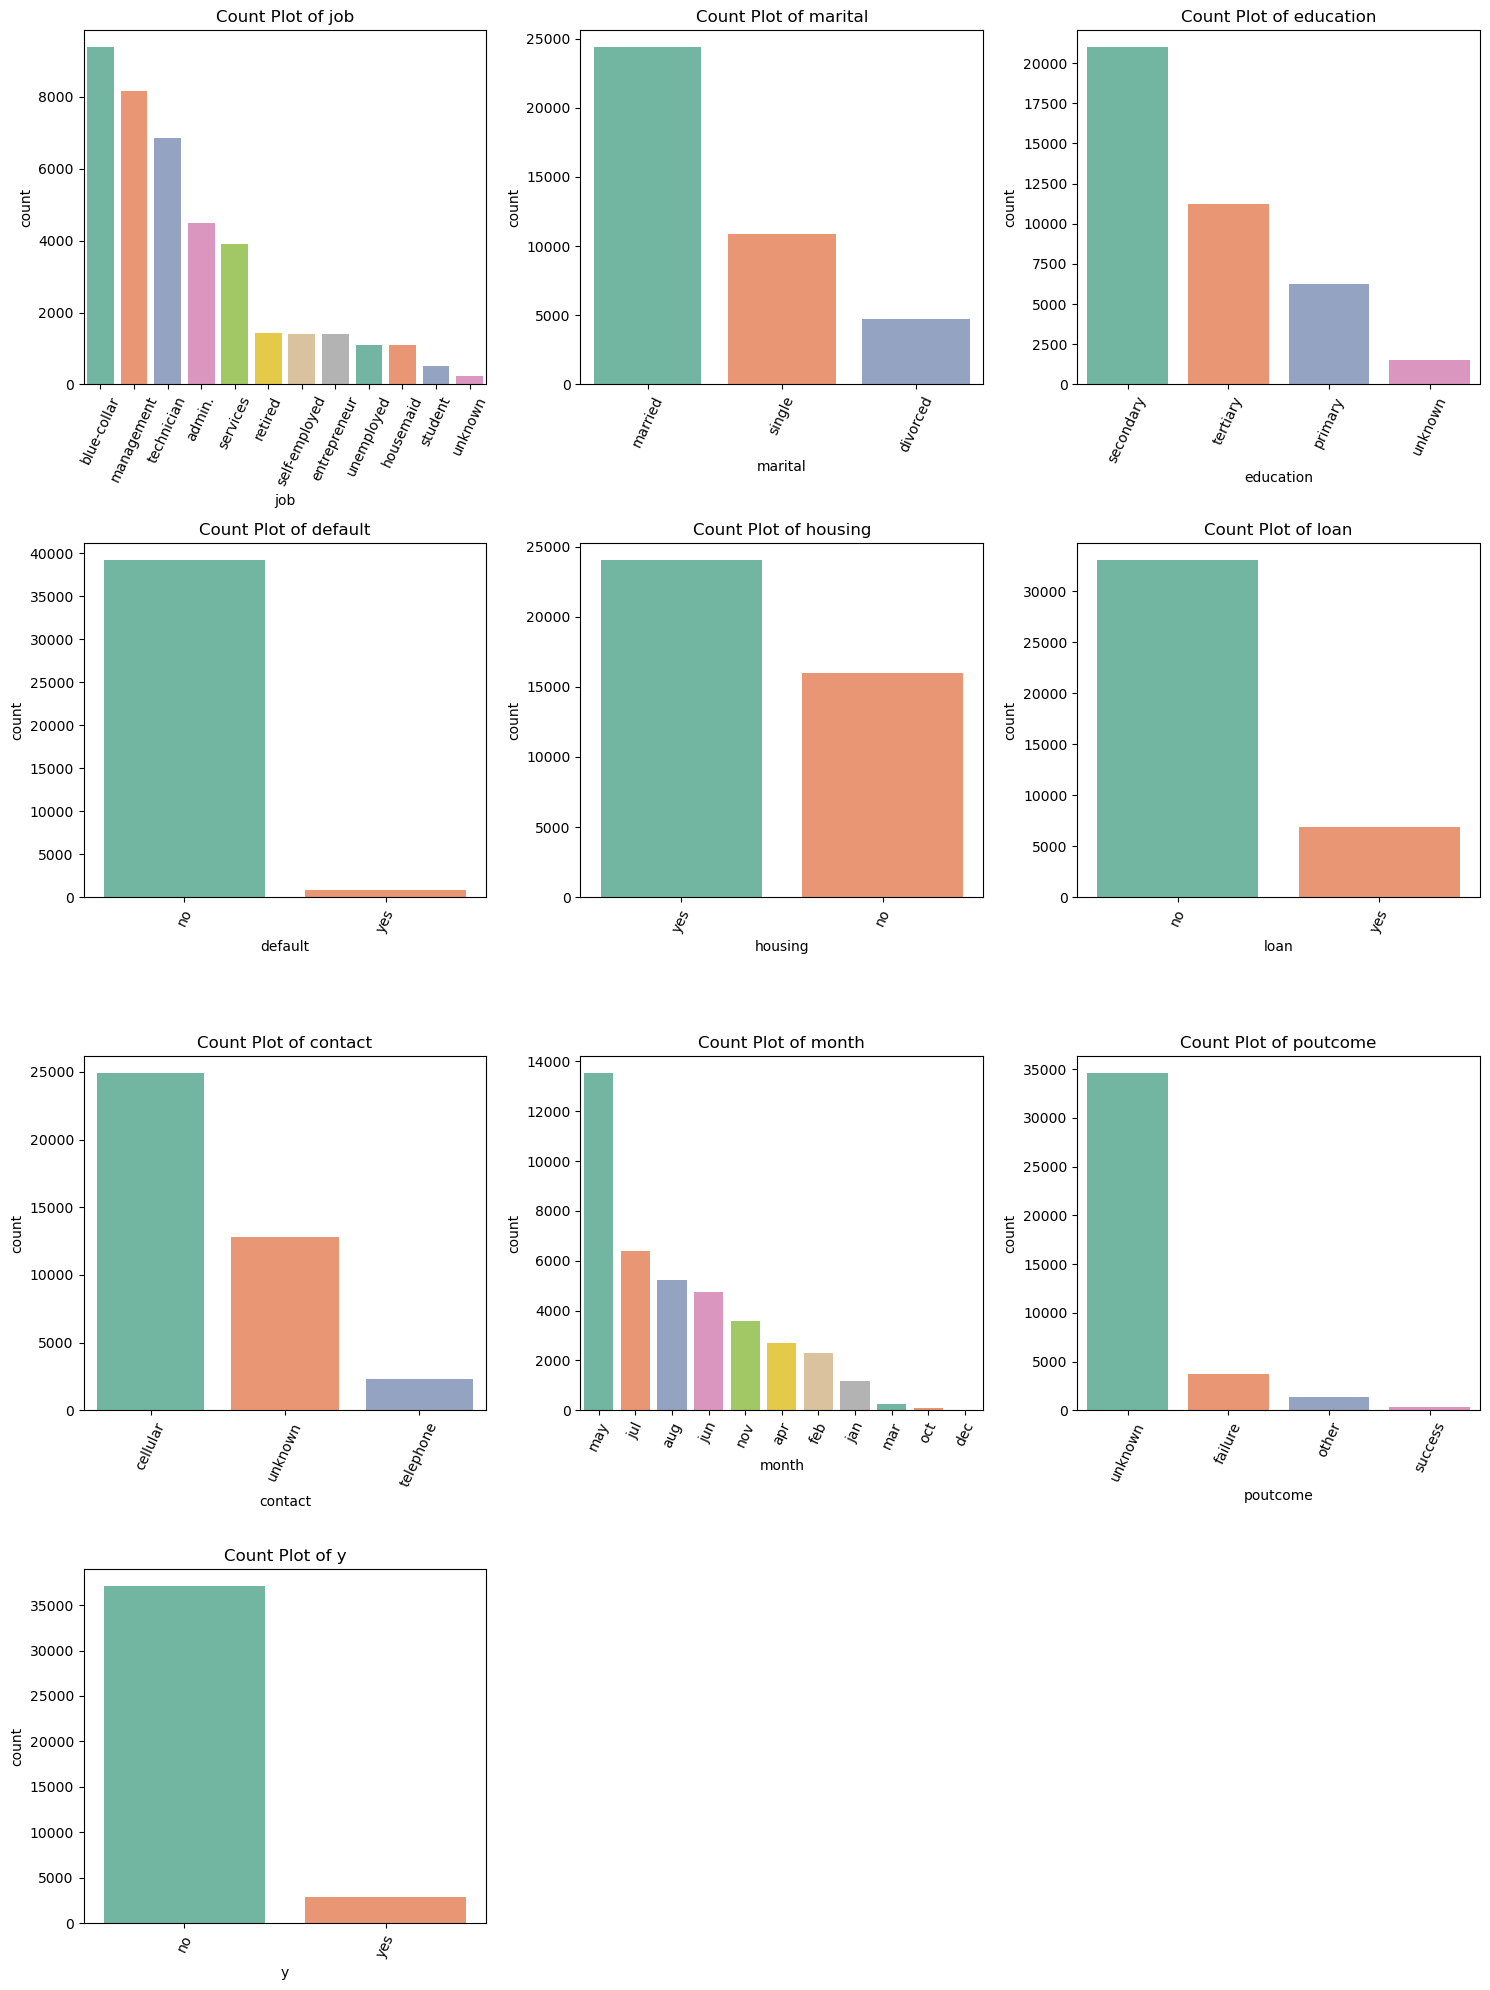

In [49]:
# Visualization for Categorical Columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
cols = 3  
rows = (num_cols // cols) + (1 if num_cols % cols != 0 else 0) 

# Create the figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].tick_params(axis='x', rotation=65) 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

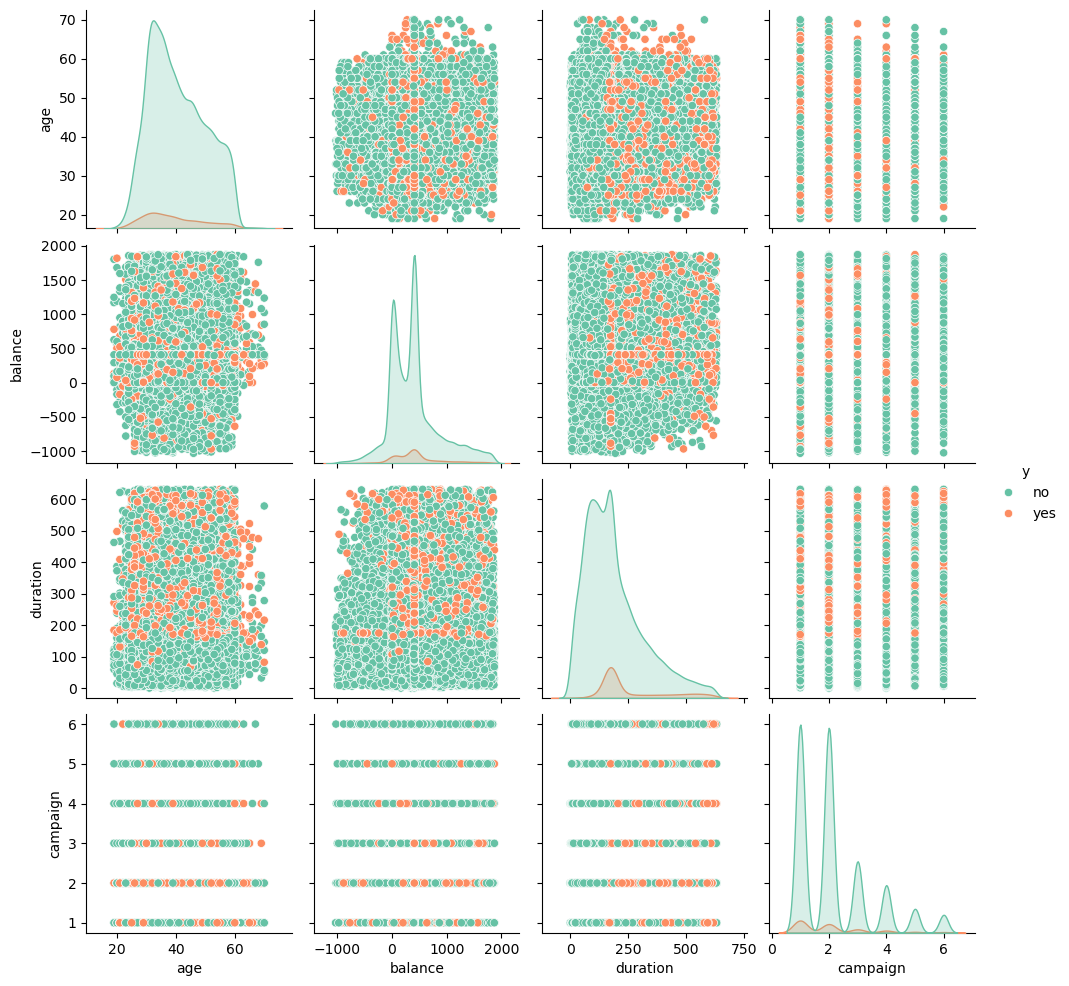

In [51]:
# Pairplot to see interactions between variables
# show the relationships between variables in a dataset. 
sns.pairplot(train_data[['age', 'balance', 'duration', 'campaign', 'y']], hue='y', palette='Set2')
plt.show()

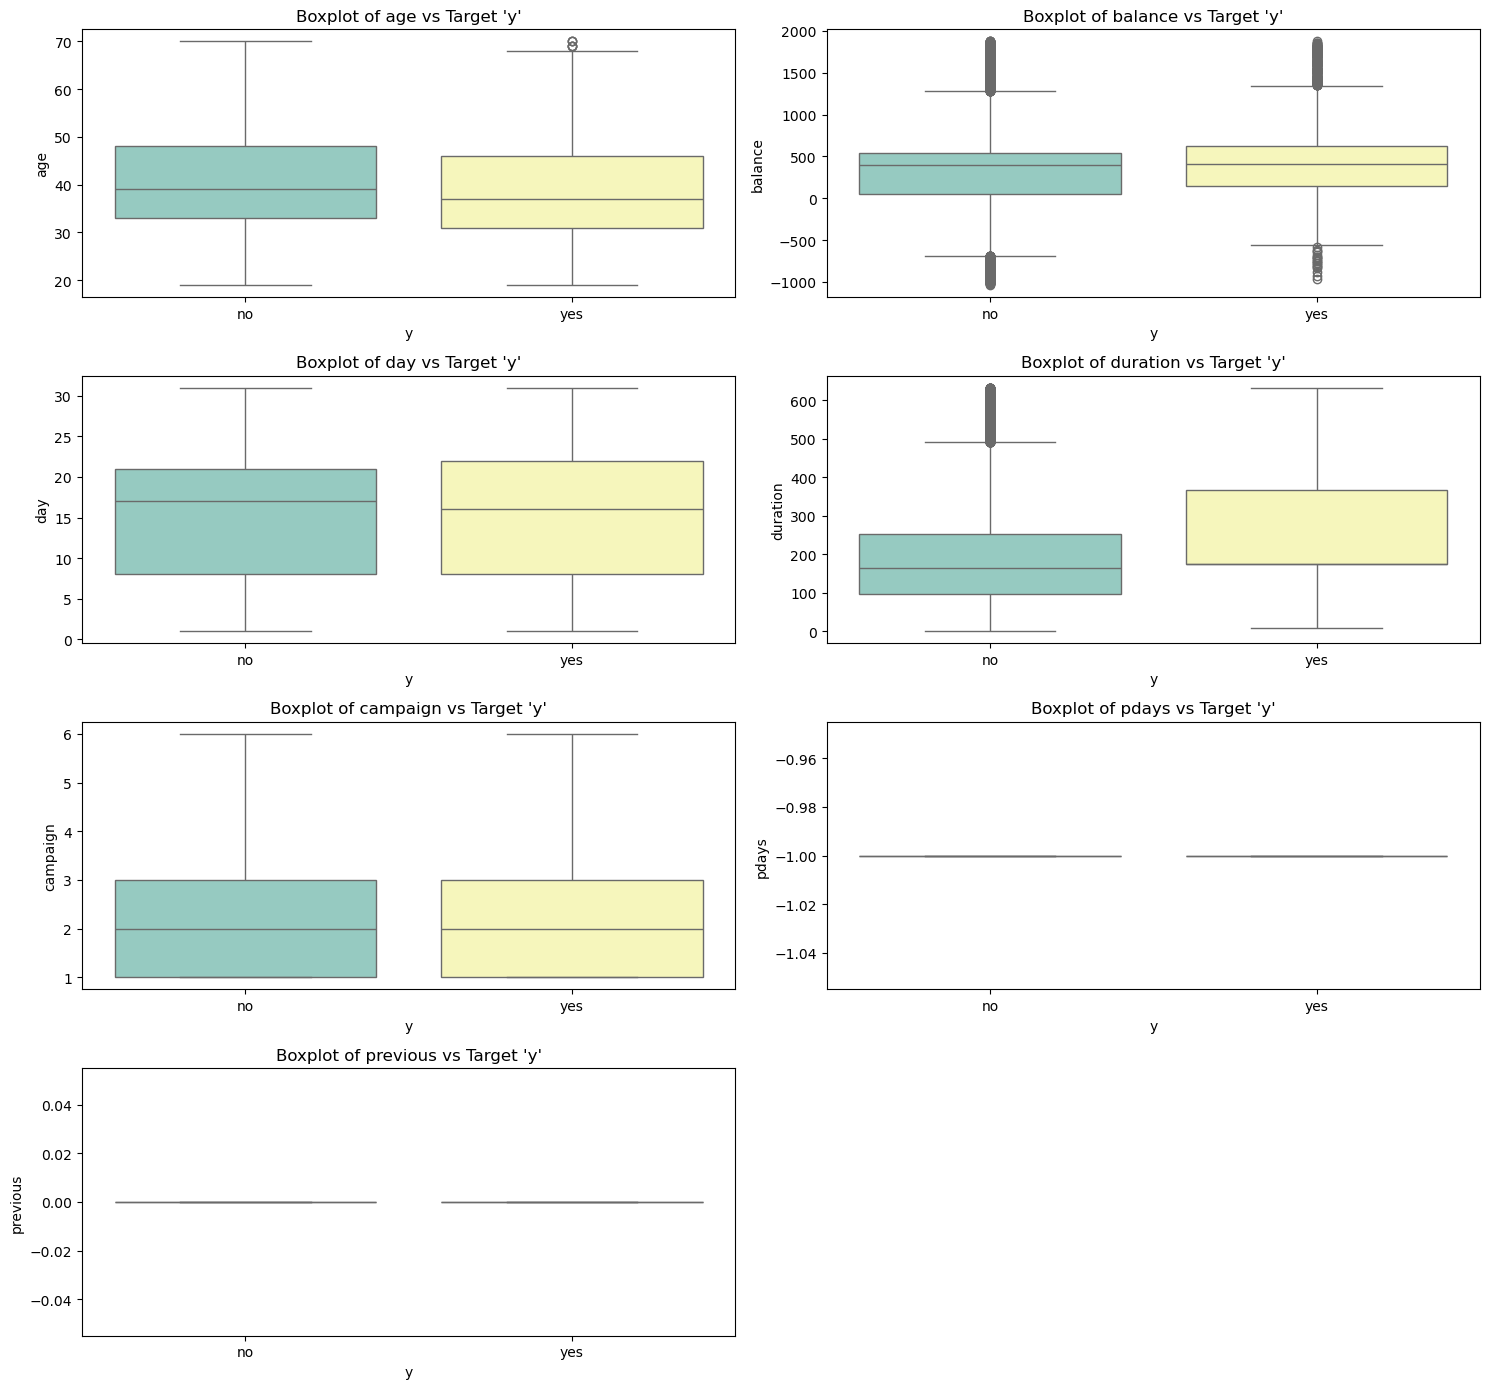

In [56]:
# Boxplots for Outlier Detection with Two Columns per Row
plt.figure(figsize=(15, len(numerical_cols) * 2))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 1) // 2, 2, i)  # Two columns per row
    sns.boxplot(data=train_data, x='y', y=col, palette='Set3')
    plt.title(f"Boxplot of {col} vs Target 'y'")
    plt.xlabel('y')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

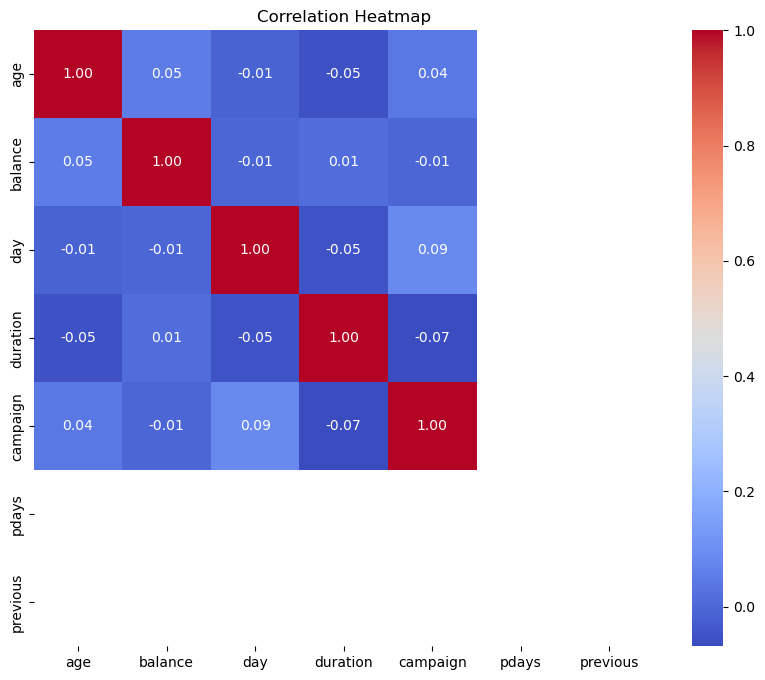

In [60]:
# Correlation Heatmap
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data[numerical_columns].corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.show()

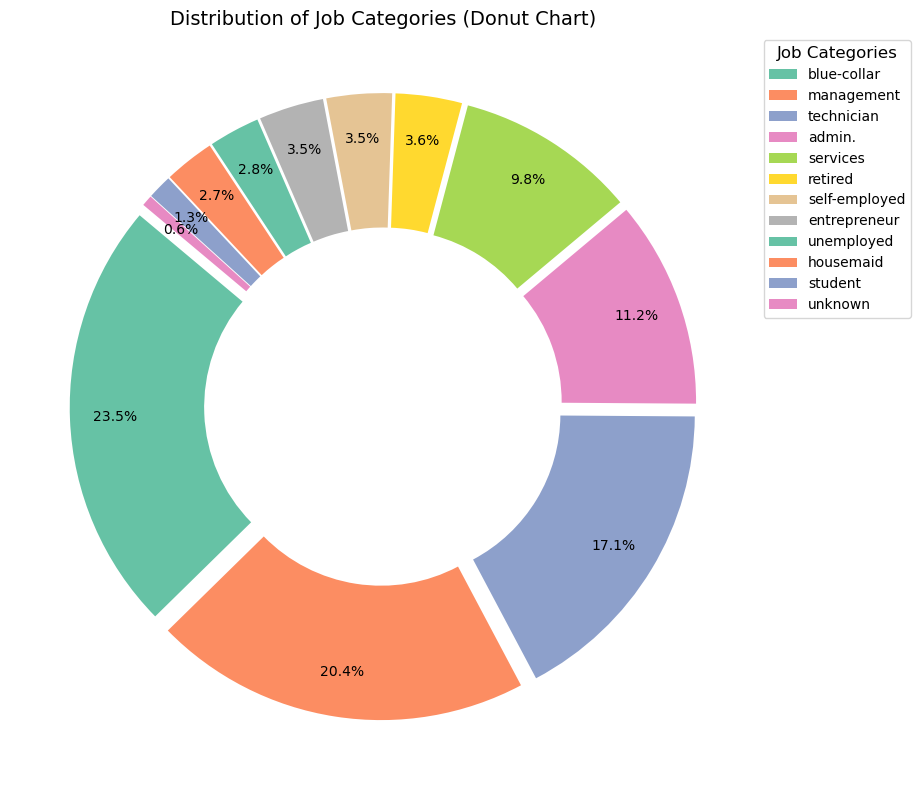

In [29]:
# Count the values for the job column
job_counts = train_data['job'].value_counts()

# Plot the donut chart
plt.figure(figsize=(10, 8))
colors = plt.cm.Set2.colors[:len(job_counts)]
explode = [0.05] * len(job_counts)  # Slightly separate each slice

plt.pie(
    job_counts,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'width': 0.45},
    explode=explode,
    pctdistance=0.85  # Position percentages closer to the center
)


# Add title and legend
plt.title("Distribution of Job Categories (Donut Chart)", fontsize=14)
plt.legend(
    job_counts.index,
    title="Job Categories",
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=10,
    title_fontsize=12
)

# Display the chart
plt.tight_layout()
plt.show()

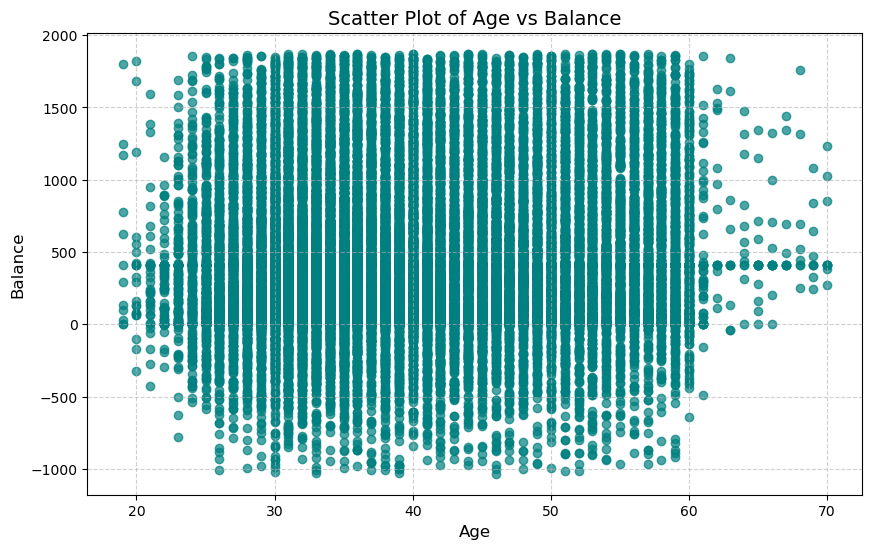

In [30]:
# scatter plot for age vs balance
plt.figure(figsize=(10, 6))
plt.scatter(train_data['age'], train_data['balance'], alpha=0.7, color='teal')

# Add labels and title
plt.title('Scatter Plot of Age vs Balance', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Balance', fontsize=12)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

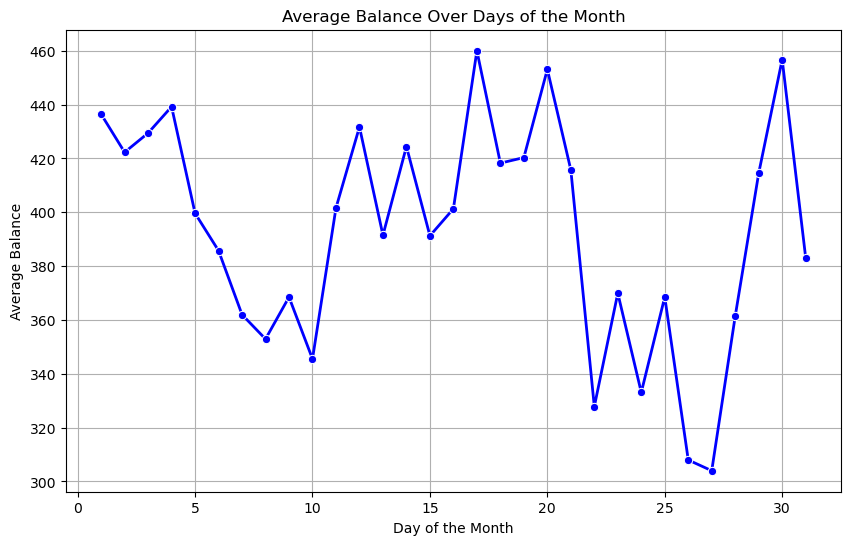

In [36]:
# Balance trend over days of the month
balance_by_day = train_data.groupby('day')['balance'].mean()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=balance_by_day, color='blue', linewidth=2,marker ='o')
plt.title('Average Balance Over Days of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Balance')
plt.grid(True)
plt.show()